## Aggregating annotations

#### From zip files

In [4]:
import json
import glob
import zipfile
import pandas as pd

annotation_folder = "/Users/piek/Desktop/t-MA-HLT-introduction-2024/lab-assignments/HLT-2024-lab0-annotations"
all_annotations = []
for file in glob.glob(annotation_folder + '/*.zip'):
    with zipfile.ZipFile(file) as myzip:
        for filename in myzip.namelist():
            if filename.endswith('.json'):
                f = myzip.open(filename)
                try:
                    print(filename)
                    d = json.load(f)
                    all_annotations.extend(d)
                except:
                    print(filename)

annotator_Yunchong Huang_Hey, I'm Lolamama.json
annotator_Victoria_Hello! My name is Alice..json
annotator_Lara_Hi, my name is Anna..json
annotator_Fenna_Sarah.json
annotator_Sanne_Bassie.json
annotator_Hannah_Moon..json
annotator_Manya_Leon.json


In [1]:
import json
import glob
import zipfile
import pandas as pd

annotation_folder = "/Users/piek/Desktop/t-MA-HLT-introduction-2024/lab-assignments/HLT-2024-lab0-annotations"
all_annotations = []
for filename in glob.glob(annotation_folder + '/*.json'):
    with open(filename) as f:
        try:
            d = json.load(f)
            all_annotations.extend(d)
        except:
            print(filename)

In [2]:
print('Total number of annotations', len(all_annotations))

Total number of annotations 24


In [3]:
anno_dict = {}
for annotations in all_annotations:
    for annotation in annotations:
        speaker = annotation['speaker']
        annotator = annotation['Annotator']
        emotion = annotation['Gold']
        if speaker == 'Llama':
            continue
        turn_id = annotation['turn_id']
        key = speaker+str(turn_id)
        if key in anno_dict:
            anno = anno_dict[key]
            if 'Votes' in anno:
                anno['Votes'].append(emotion)
                anno['Annotators'].append(annotator)
            else:
                anno['Votes'] = [emotion]
                anno['Annotators']= [annotator]
        else:
            annotation['Votes'] = [emotion]
            annotation['Annotators']= [annotator]
            anno_dict[key]=annotation

In [4]:
merged_annotations = []
for key in anno_dict:
    merged_annotations.append(anno_dict[key])
all_file = "all_annotations.json"
with open(all_file,'w') as file:
    json.dump(merged_annotations, file, indent = 4)

## Data statistics

In [5]:
from collections import Counter, OrderedDict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_labels_with_counts(labels, values):
    total = 0
    for v in values:
        total+=v
    print('Total of values', total)
    ax = sns.barplot(x=labels, y=values)
    #rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
    # Add values above bars
    for i, v in enumerate(values):
        ax.text(i, v + 0.2, str(int((v/total*100)))+'%', ha='center')
    plt.show()

In [6]:
df = pd.read_json("all_annotations.json")
df.head()

,utterance,speaker,turn_id,Gold,Annotator,Votes,Annotators
0,"Hey, I'm Lolamama.","Hi, I'm Lalamama.",2,neutral,Yunchong Huang,"[neutral, neutral]","[Yunchong Huang, Hannah]"
1,"Let's have a chat, but please restrict your re...","Hey, I'm Lolamama.",4,neutral,Yunchong Huang,"[neutral, neutral]","[Yunchong Huang, Hannah]"
2,"The weather today is just ridiculous, I was ca...","Hey, I'm Lolamama.",6,anger,Yunchong Huang,"[anger, disgust]","[Yunchong Huang, Hannah]"
3,"Oh wow, you also know how it feels in rain? Yo...","Hey, I'm Lolamama.",8,surprise,Yunchong Huang,"[surprise, surprise]","[Yunchong Huang, Hannah]"
4,"OK, if you are able to hang around in disguise...","Hey, I'm Lolamama.",10,fear,Yunchong Huang,"[fear, neutral]","[Yunchong Huang, Hannah]"


Speaker values {'Hi Llama.', 'Kristof', 'Artemidorus', 'Coins', 'Hajmola', 'Pretzel.', 'Leon', 'Jake', 'Sissy', 'Moon.', 'Hi Llama, my name is Pretzel.', 'Hello', 'Hi, my name is Anna.', "Hi, I'm Lalamama.", 'Igor', 'Coco', 'Bob', 'Bassie', 'Human', 'bye', 'Sarah', "Hey, I'm Lolamama.", 'Hello! My name is Alice.'}

OrderedDict([('Artemidorus', 12), ('Bassie', 13), ('Bob', 21), ('Coco', 20), ('Coins', 10), ('Hajmola', 21), ('Hello', 19), ('Hello! My name is Alice.', 20), ("Hey, I'm Lolamama.", 25), ('Hi Llama, my name is Pretzel.', 7), ('Hi Llama.', 2), ("Hi, I'm Lalamama.", 1), ('Hi, my name is Anna.', 21), ('Human', 1), ('Igor', 20), ('Jake', 19), ('Kristof', 13), ('Leon', 25), ('Moon.', 20), ('Pretzel.', 11), ('Sarah', 20), ('Sissy', 20), ('bye', 2)])
Total of values 343


/var/folders/6w/bw7dqbl9727c48pcjjh32r140000gn/T/ipykernel_84974/2446219359.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=65)


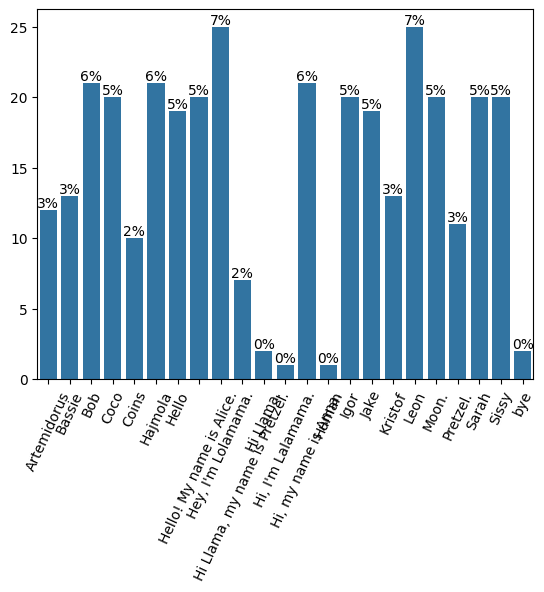

In [7]:
speakers = df['speaker']
print('Speaker values', set(speakers))
print()
counts = Counter(speakers)
counts_sorted = OrderedDict(sorted(counts.items()))
print(counts_sorted)
labels = list(counts_sorted.keys())
values = list(counts_sorted.values())
plot_labels_with_counts(labels, values)

Emotion values {'fear', 'sadness', 'joy', 'anger', 'neutral', 'surprise', 'disgust'}

OrderedDict([('anger', 72), ('disgust', 23), ('fear', 29), ('joy', 55), ('neutral', 106), ('sadness', 39), ('surprise', 19)])
Total of values 343


/var/folders/6w/bw7dqbl9727c48pcjjh32r140000gn/T/ipykernel_84974/2446219359.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=65)


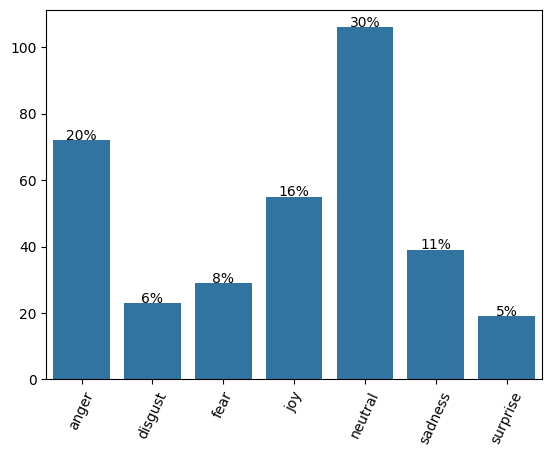

In [9]:
talks = {}
emotions = []
for ind in df.index:
    votes = df['Votes'][ind]
    counts = Counter(votes)
    counts_sorted = OrderedDict(sorted(counts.items()))
    #print(counts_sorted)
    emotion = next(iter(counts_sorted))
    annotator = df['Annotator'][ind]
    speaker = df['speaker'][ind]
    if not annotator=='auto' and not str(emotion)=='nan':
        emotions.append(emotion)
    if speaker in talks:
        talks[speaker].append(str(annotator)+"-"+str(emotion))
    else:
        talks[speaker]=[str(annotator)+"-"+str(emotion)]

print('Emotion values', set(emotions))
print()
counts = Counter(emotions)
counts_sorted = OrderedDict(sorted(counts.items()))
print(counts_sorted)
labels = list(counts_sorted.keys())
values = list(counts_sorted.values())
plot_labels_with_counts(labels, values)

## End of notebook